In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from utils import plot_tree_boundaries

features = ['age','acutephysiologyscore']
outcome = 'actualhospitalmortality'

data = pd.read_csv('eicu_processed.csv')

x = data[features]
y = data[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Gradient Boosting

Next, we move on to gradient boosting. Gradient boosting elegantly combines concepts from the previous methods. As a “boosting” method, gradient boosting involves iteratively building trees, aiming to improve upon misclassifications of the previous tree. Gradient boosting also borrows the concept of sub-sampling the variables (just like Random Forests), which can help to prevent overfitting.

While it is too much to express in this tutorial, the biggest innovation in gradient boosting is that it provides a unifying mathematical framework for boosting models. The approach explicitly casts the problem of building a tree as an optimization problem, defining mathematical functions for how well a tree is performing (which we had before) and how complex a tree is. In this light, one can actually treat AdaBoost as a “special case” of gradient boosting, where the loss function is chosen to be the exponential loss.

Again, our data cannot contain missing data. Let’s fix that and build a gradient boosting model.

In [6]:
# Fill missing data with -1
data_no_nans = data.fillna(-1)

x = data_no_nans[features]
y = data_no_nans[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

**Task:** Use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to train a gradient boosting classifier with 10 estimators.

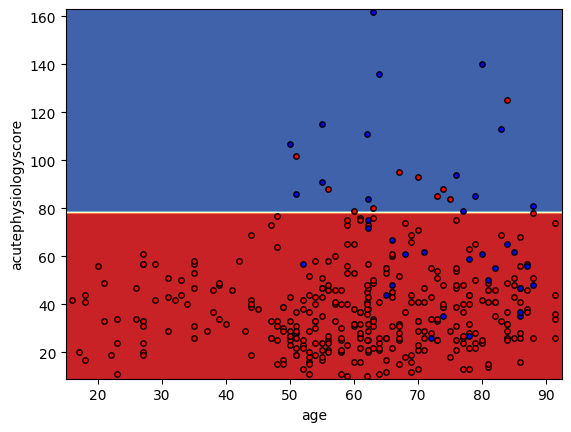

In [7]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(321)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                   max_depth=1, random_state=0)
model = model.fit(x_train, y_train)

plot_tree_boundaries(model, x_train, y_train, feature_names=features, target_names=['Alive', 'Dead'])